In [1]:
import os
from skimage.measure import regionprops_table,regionprops
from tifffile import imread
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import napari
import seaborn as sns

In [97]:
store_dir = r'R:\data_analysis\Tyler\hgsc\data\hgsc-full-r1\oc3-cbpp'

im = imread(os.path.join(store_dir,'oc3-cbpp_A-palbociclib.ome.tif'))
mask = imread(os.path.join(store_dir,'oc3-cbpp_A-palbociclib_segmented.tif'))

In [91]:
table = pd.DataFrame(regionprops_table(mask,properties=('label','area')))

table['DAPI-mean'] = regionprops_table(mask,
                  intensity_image=im[0],
                  properties=['intensity_mean'])['intensity_mean']

table['EdU-mean'] = regionprops_table(mask,
                  intensity_image=im[1],
                  properties=['intensity_mean'])['intensity_mean']

table

,label,area,DAPI-mean,EdU-mean
0,1,3235.0,445.229985,11884.588872
1,2,2683.0,367.137160,2386.950801
2,3,1254.0,504.057416,1870.708931
3,4,2750.0,580.956000,2340.645818
4,5,2318.0,633.225626,2382.525453
...,...,...,...,...
6727,6728,3684.0,277.037731,2695.016015
6728,6729,1879.0,269.805216,3524.218201
6729,6730,2571.0,312.036951,8938.328277
6730,6731,527.0,593.201139,2646.068311


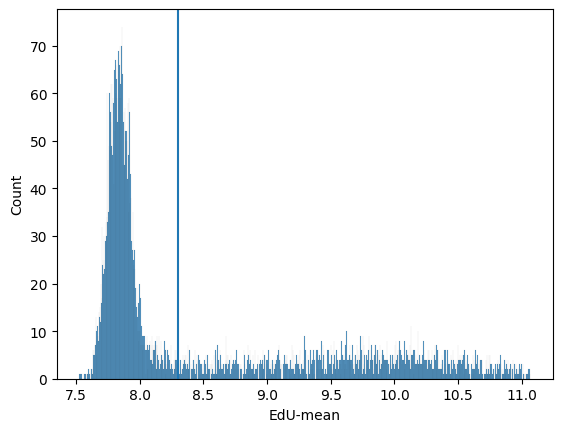

In [93]:
data = table['EdU-mean']

fig,ax = plt.subplots(1,1)


#ax = sns.histplot(data, bins=100)#, size=0.1, alpha=0.2)
ax = sns.histplot(np.log(data),bins=1000)

threshold = 8.3
ax.axvline(x=threshold)

In [94]:
fin_int = np.exp(threshold)
print(f'EdU Intensity: {fin_int}')

EdU Intensity: 4023.872393822313


In [95]:
perc_pos = len(table[table['EdU-mean'] > fin_int])/len(table['EdU-mean'])
print(perc_pos)

0.3593285799168152


In [69]:
#total_df = pd.DataFrame(columns=['Drug','Condition',f'% EdU',f'% Post-S'])
total_df

,Drug,Condition,% EdU,% Post-S
0,Berzosertib,Ctrl,0.354962,NaN
1,Berzosertib,B,0.844560,NaN
2,Berzosertib,C,0.415025,NaN
3,Berzosertib,D,0.340909,NaN


In [96]:
entry = { 'Drug': 'Berzosertib',
           'Condition': 'G',
           f'% EdU': perc_pos,
           f'% Post-S Phase': 0}

total_df.loc[len(total_df)] = entry

total_df

,Drug,Condition,% EdU,% Post-S
0,Berzosertib,Ctrl,0.354962,NaN
1,Berzosertib,B,0.844560,NaN
2,Berzosertib,C,0.415025,NaN
3,Berzosertib,D,0.340909,NaN
4,Berzosertib,E,0.347126,NaN
5,Berzosertib,F,0.371482,NaN
6,Berzosertib,G,0.359329,NaN


In [80]:
v = napari.Viewer()

v.add_image(im)
v.add_labels(mask)

<Labels layer 'mask' at 0x1e465b38c10>

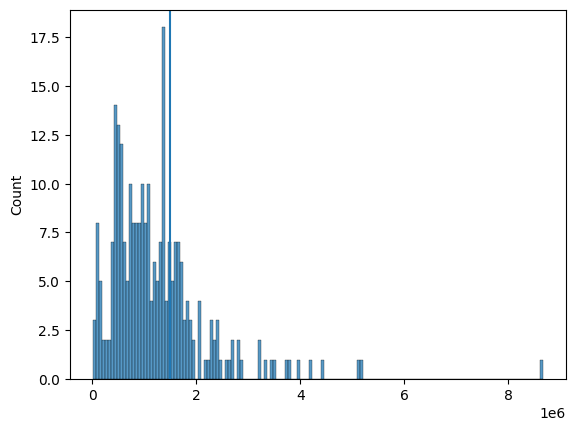

In [169]:
data = table['DAPI-mean']*table['area']

fig,ax = plt.subplots(1,1)


ax = sns.histplot(data, bins=150)#, size=0.1, alpha=0.2)
#ax = sns.histplot(np.log(data),bins=100)

threshold = 1500000
ax.axvline(x=threshold)